# Intro to CNN and Computer Vision

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close

--2021-09-14 21:58:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.184.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  80.9MB/s    in 1.3s    

2021-09-14 21:58:48 (80.9 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

## Inspect the data 

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print("There are " + str(len(dirnames)) + " directories and " + str(len(filenames)) + " images in" + str(dirpath))

There are 2 directories and 1 images inpizza_steak
There are 2 directories and 1 images inpizza_steak/train
There are 0 directories and 750 images inpizza_steak/train/pizza
There are 0 directories and 750 images inpizza_steak/train/steak
There are 2 directories and 1 images inpizza_steak/test
There are 0 directories and 250 images inpizza_steak/test/pizza
There are 0 directories and 250 images inpizza_steak/test/steak


To visualize our images, first let's get the class names programatically

In [ ]:
# Get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [ ]:
class_names = class_names[1:] # Remove DS_Store
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print("Image shape: " + str(img.shape)) # Show the shape of the image

  return img

Image shape: (384, 512, 3)


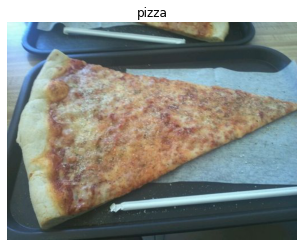

In [ ]:
# View a random image from the training dataset
img = view_random_image("pizza_steak/train", "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[215, 247, 246],
        [216, 248, 247],
        [216, 248, 247],
        ...,
        [135, 155, 143],
        [136, 156, 144],
        [138, 158, 146]],

       [[217, 249, 248],
        [217, 249, 248],
        [217, 249, 248],
        ...,
        [137, 157, 145],
        [140, 160, 148],
        [142, 162, 150]],

       [[217, 251, 250],
        [218, 252, 251],
        [219, 251, 250],
        ...,
        [139, 159, 147],
        [142, 162, 150],
        [145, 165, 153]],

       ...,

       [[ 63,  80,  88],
        [ 62,  79,  87],
        [ 62,  79,  87],
        ...,
        [ 33,  49,  48],
        [ 32,  48,  47],
        [ 32,  46,  46]],

       [[ 58,  75,  83],
        [ 59,  76,  84],
        [ 61,  78,  86],
        ...,
        [ 34,  50,  49],
        [ 32,  48,  47],
        [ 32,  46,  46]],

       [[ 46,  63,  71],
        [ 49,  66,  74],
        [ 54,  71,  79],
        ...,
        [ 34,  50,  4

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1 (normalize)
img/255.0 #(255 is the max pizel value)

array([[[0.84313725, 0.96862745, 0.96470588],
        [0.84705882, 0.97254902, 0.96862745],
        [0.84705882, 0.97254902, 0.96862745],
        ...,
        [0.52941176, 0.60784314, 0.56078431],
        [0.53333333, 0.61176471, 0.56470588],
        [0.54117647, 0.61960784, 0.57254902]],

       [[0.85098039, 0.97647059, 0.97254902],
        [0.85098039, 0.97647059, 0.97254902],
        [0.85098039, 0.97647059, 0.97254902],
        ...,
        [0.5372549 , 0.61568627, 0.56862745],
        [0.54901961, 0.62745098, 0.58039216],
        [0.55686275, 0.63529412, 0.58823529]],

       [[0.85098039, 0.98431373, 0.98039216],
        [0.85490196, 0.98823529, 0.98431373],
        [0.85882353, 0.98431373, 0.98039216],
        ...,
        [0.54509804, 0.62352941, 0.57647059],
        [0.55686275, 0.63529412, 0.58823529],
        [0.56862745, 0.64705882, 0.6       ]],

       ...,

       [[0.24705882, 0.31372549, 0.34509804],
        [0.24313725, 0.30980392, 0.34117647],
        [0.24313725, 0

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically we need a way to:

- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 40s 252ms/step - loss: 0.5632 - accuracy: 0.6867 - val_loss: 0.3985 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4168 - accuracy: 0.8140 - val_loss: 0.3443 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3858 - accuracy: 0.8247 - val_loss: 0.3120 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3377 - accuracy: 0.8540 - val_loss: 0.3052 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.2998 - accuracy: 0.8807 - val_loss: 0.2936 - val_accuracy: 0.8720


🔑 **Note:** If the above cell is taking longer than ~15 seconds per epoch, make sure you're using a GPU bu going to Runtime -> Cahange Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above)

In [ ]:
# First epoch before we start to use a GPU
# 47/47 [==============================] - 99s 2s/step - loss: 0.5942 - accuracy: 0.6813 - val_loss: 1.1119 - val_accuracy: 0.5000

📖 **Resource:** CNN explainer: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

## Using the same model as before

Let's replicate the model we've built in a previous project to see if it works with our image data

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate that model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),                             
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile that model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 1.5365 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Let's try to improve model_2

In [ ]:
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),                               
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 3.3194 - accuracy: 0.6287 - val_loss: 0.4907 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.9214 - accuracy: 0.6647 - val_loss: 0.7480 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.7506 - accuracy: 0.7413 - val_loss: 0.4634 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.5884 - accuracy: 0.7600 - val_loss: 0.4434 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4594 - accuracy: 0.8047 - val_loss: 0.6265 - val_accuracy: 0.7300


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** You can think of trainable **parameters as patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classification

1. Become one with the data
2. Preprocess the data (prepared it four our model, the main step here was scaling/normalizing) and turning our data into batches
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (288, 512, 3)


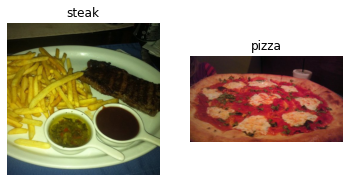

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches.**

A batch is a small subset of the data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your preprocessor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

- Why 32? https://twitter.com/ylecun/status/989610208497360896?s=20



In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in the data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

> 🔑**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be the baseline, a 3 layer CNN)
model_4 = Sequential([
  Conv2D(filters=10, # filters is the number of sliding window going across an iniput (higher = more complex)
         kernel_size=3, # the size of the sliding window going across an input (btw, you can also write (3,3) instead of 3)
         strides=1, # the size of the step the sliding window takes across an input (btw, you can also write (1,1) instead of 1)
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224,224, 3)), # input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 240ms/step - loss: 0.9485 - accuracy: 0.6967 - val_loss: 0.4312 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4107 - accuracy: 0.8080 - val_loss: 0.4133 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3091 - accuracy: 0.8787 - val_loss: 0.3758 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.1425 - accuracy: 0.9593 - val_loss: 0.5294 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.0778 - accuracy: 0.9747 - val_loss: 0.5168 - val_accuracy: 0.7960


### 5. Evaluating our model

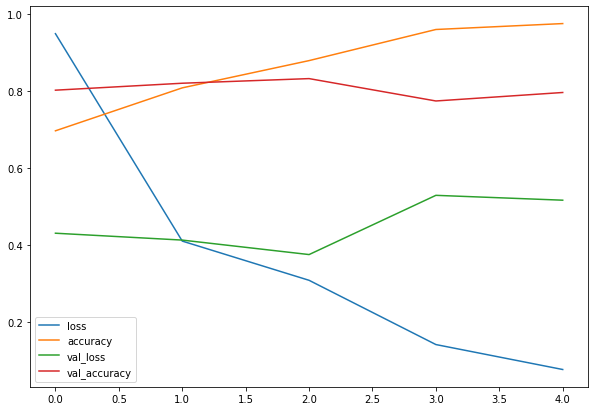

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation_loss starts to increase**, it's likely that the model is **overfitting** the training dataset.

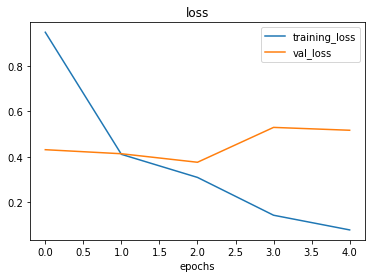

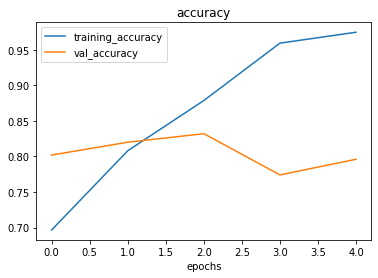

In [ ]:
# Check the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**

### 6. Adjusting the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:

- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,2)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5


InvalidArgumentError: ignored